In [5]:
# author: Larry Jiang
# import libraries
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA,KernelPCA
from sklearn.cross_decomposition import CCA
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn

os.chdir('C:\\Users\\jiawy\\Desktop') # set root diectory 

# disable warnings

import warnings
warnings.simplefilter("ignore")

# Data cleaning and preprocessing

In [6]:
# import excel file and spilt into variables
df = pd.read_excel('churn.xlsx')
x = df.drop(['customerID','Churn'],axis=1)
y = df['Churn']

In [7]:
# check data first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# check data see if any missing value and wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# TotalCharges is a object data type, let's change to float64
x['TotalCharges'] = x['TotalCharges'].replace(' ',0)
x['TotalCharges']  = pd.to_numeric(x['TotalCharges'])

df['TotalCharges'] = df['TotalCharges'].replace(' ',0)
df['TotalCharges']  = pd.to_numeric(df['TotalCharges'])

In [10]:
# Label Encoding and create dummy variables for non numeric data.
x = pd.get_dummies(x)
y = y.map({'Yes':1,'No':0})

In [11]:
# let's check the data again
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [12]:
# check columns 
x.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

# Training the model with different machine learning algorithm

In [16]:
# split the data into train and test dataset
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
# create function for logistic regression
def LR(xtrain,ytrain,xtest,ytest,cv=5):

    pip =  Pipeline([('mms',MinMaxScaler()),
                ('skb',SelectKBest(chi2)),
                ('pca',PCA(random_state=1)),
                ('lr',LogisticRegression())
                    ])
    params = ({'skb__k':[1,2,3,4,5,6,7,8,9,10],
              'pca__n_components':[0.5,0.8],
              'lr__penalty':['l1','l2','elasticnet'],
              'lr__solver':['lbfgs','liblinear','sag'],
              'lr__C':[0.1,1,2,3,4,5,6,7,8,9,10]})
    grid = GridSearchCV(pip,param_grid=params,cv=5).fit(xtrain,ytrain)
    print('Best parameters: {} \n'.format(grid.best_params_))
    print('Best Score: {:.4f} \n'.format(grid.best_score_))
    print('Best estimator: {} \n'.format(grid.best_estimator_))
    print('Grid Searched Testing score: {:.4f}'.format(grid.score(xtest,ytest)))
    print('Grid Searched Training score: {:.4f} \n'.format(grid.score(xtrain,ytrain)))
    print('Classification report: \n')
    print(classification_report(ytest,grid.predict(xtest)))
    print('confusion matrix: \n')
    sns.heatmap(confusion_matrix(ytest,grid.predict(xtest)),annot=True,fmt='.0f')


Best parameters: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs', 'pca__n_components': 0.8, 'skb__k': 10} 

Best Score: 0.7835 

Best estimator: Pipeline(memory=None,
         steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('skb',
                 SelectKBest(k=10,
                             score_func=<function chi2 at 0x00000223C1B813A8>)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.8,
                     random_state=1, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                   

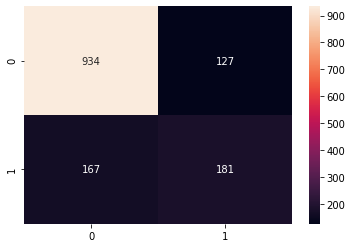

In [12]:
# training the model with Logistic regression
LR(xtrain,ytrain,xtest,ytest,5)

In [13]:
# create function for Random Forest Classifier
def RFC(xtrain,ytrain,xtest,ytest,cv):
    pip = Pipeline([('scale',MinMaxScaler()),
                   ('skb',SelectKBest(chi2)),
                   ('pca',PCA()),
                   ('rfc',RandomForestClassifier())])
    params = ({'skb__k':[1,2,3,4,5,6,7,8,9,10],
               'pca__n_components':[0.5,0.8],
               'rfc__n_estimators':[10,20,30,50,70,90],
               'rfc__criterion':['gini','entropy'],
               'rfc__max_depth':[3,4,5,6]})
    cv = GridSearchCV(pip,param_grid=params,cv=cv)
    cv.fit(xtrain,ytrain)
    print('Best parameters: {} \n'.format(cv.best_params_))
    print('Best Score: {:.4f} \n'.format(cv.best_score_))
    print('Best estimator: {} \n'.format(cv.best_estimator_))
    print('Grid Searched Testing score: {:.4f}'.format(cv.score(xtest,ytest)))
    print('Grid Searched Training score: {:.4f} \n'.format(cv.score(xtrain,ytrain)))
    print('Classification report: \n')
    print(classification_report(ytest,cv.predict(xtest)))
    print('confusion matrix: \n')
    sns.heatmap(confusion_matrix(ytest,cv.predict(xtest)),annot=True,fmt='.0f')

Best parameters: {'pca__n_components': 0.5, 'rfc__criterion': 'entropy', 'rfc__max_depth': 3, 'rfc__n_estimators': 30, 'skb__k': 10} 

Best Score: 0.7804 

Best estimator: Pipeline(memory=None,
         steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('skb',
                 SelectKBest(k=10,
                             score_func=<function chi2 at 0x00000223C1B813A8>)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=3, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=

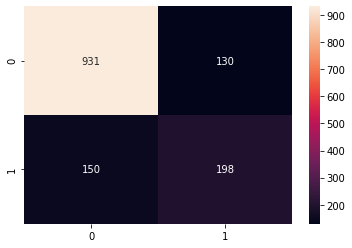

In [14]:
# training the model with Random Forest Classifier
RFC(xtrain,ytrain,xtest,ytest,5)

In [18]:
# create function for Decision Tree Classifier
def DecisionTree(xtrain,ytrain,xtest,ytest,cv=5):
    pip = Pipeline([('scale',MinMaxScaler()),
                   ('skb',SelectKBest(chi2)),
                   ('pca',PCA()),
                   ('dc',DecisionTreeClassifier(random_state=1))])

    params = ({'skb__k':[1,2,3,4,5,6,7,8,9,10],
               'pca__n_components':[0.5,0.8],
               'dc__criterion':['gini',"entropy"],
               'dc__max_features':[1,2,3,4,5,6,7,8],
              'dc__max_depth':[3,4,5,6,7,8,9,10]})
    grid = GridSearchCV(pip,param_grid=params,cv=cv).fit(xtrain,ytrain)
    print('Best parameters: {} \n'.format(grid.best_params_))
    print('Best Score: {:.4f} \n'.format(grid.best_score_))
    print('Best estimator: {} \n'.format(grid.best_estimator_))
    print('Grid Searched Testing score: {:.4f}'.format(grid.score(xtest,ytest)))
    print('Grid Searched Training score: {:.4f} \n'.format(grid.score(xtrain,ytrain)))
    print('Classification report: \n')
    print(classification_report(ytest,grid.predict(xtest)))
    print('confusion matrix: \n')
    sns.heatmap(confusion_matrix(ytest,grid.predict(xtest)),annot=True,fmt='.0f')

Best parameters: {'dc__criterion': 'entropy', 'dc__max_depth': 8, 'dc__max_features': 1, 'pca__n_components': 0.8, 'skb__k': 7} 

Best Score: 0.7810 

Best estimator: Pipeline(memory=None,
         steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('skb',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x000001ED5EF991F8>)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dc',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=8,
                                        max_features=1, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                

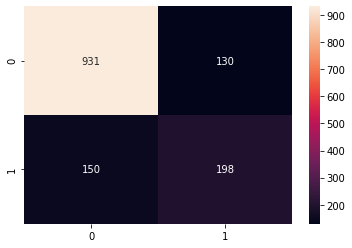

In [19]:
# training the model with Decision Tree Classifier
DecisionTree(xtrain,ytrain,xtest,ytest)

In [23]:
# create function for K Nearest Neighbors Classifier
def KNN(xtrain,ytrain,xtest,ytest,cv=5):
    pip = Pipeline([('scale',MinMaxScaler()),
                   ('skb',SelectKBest(chi2)),
                   ('pca',PCA()),
                   ('knn',KNeighborsClassifier())])
    
    params = ({'skb__k':[1,2,3,4,5,6,7,8,9,10],
               'pca__n_components':[0.5,0.8],
               'knn__n_neighbors':[3,5,7,9,13,15,17],
               'knn__algorithm':['brute','kd_tree']})
    grid = GridSearchCV(pip,param_grid=params,cv=cv).fit(xtrain,ytrain)
    print('Best parameters: {} \n'.format(grid.best_params_))
    print('Best Score: {:.4f} \n'.format(grid.best_score_))
    print('Best estimator: {} \n'.format(grid.best_estimator_))
    print('Grid Searched Testing score: {:.4f}'.format(grid.score(xtest,ytest)))
    print('Grid Searched Training score: {:.4f} \n'.format(grid.score(xtrain,ytrain)))
    print('Classification report: \n')
    print(classification_report(ytest,grid.predict(xtest)))
    print('confusion matrix: \n')
    sns.heatmap(confusion_matrix(ytest,grid.predict(xtest)),annot=True,fmt='.0f')

Best parameters: {'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 15, 'pca__n_components': 0.8, 'skb__k': 7} 

Best Score: 0.7760 

Best estimator: Pipeline(memory=None,
         steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('skb',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x000001ED5EF991F8>)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='kd_tree', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=15, p=2,
                                      weights='uniform'))],
         verbose=False) 

Grid Searched Testing score: 0.7750
Grid Searched Training score: 0.7726 

Classi

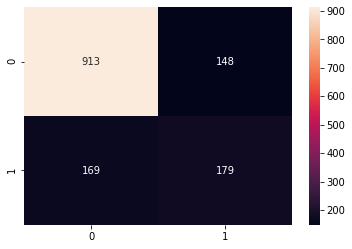

In [24]:
KNN(xtrain,ytrain,xtest,ytest)

# Exploratory data analysis

In [25]:
# create a plot function
def churn(column):
    plt.figure(figsize=(10,5))
    print(column)
    for i in range(len((df[column].unique()))):
        for row,num in zip(df[column].unique(),range(len(df[column].unique()))):
            cc = df[df[column] == df[column].unique()[i]]
            plt.subplot(1,len(df[column].unique()),i+1)
            plt.title(df[column].unique()[i])
            sns.countplot(cc['Churn'])        

In [26]:
#check the data first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# drop the customerID column because it is irrelevant to analysis 
df = df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
# change the value in SeniorCitizen to text which is easier to analysis
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'Yes',1:'No'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Yes,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Contract


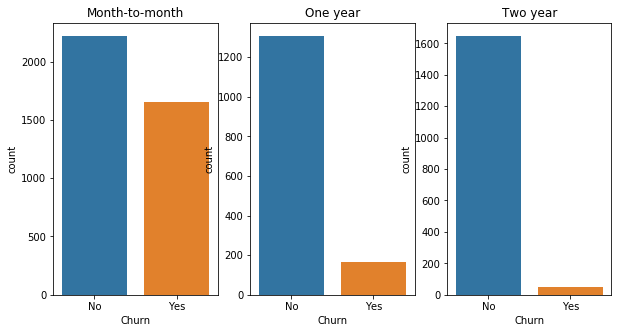

In [29]:
churn('Contract')
# Clearly see that the Month-to-month contract with higher churn rate, which means  customers are more likely to jump to
# other company with month-to-month contract. 
# One year and two year contract have relatively small churn rate, this is why tele companies want customer to sign fixed 
# contract

PaymentMethod


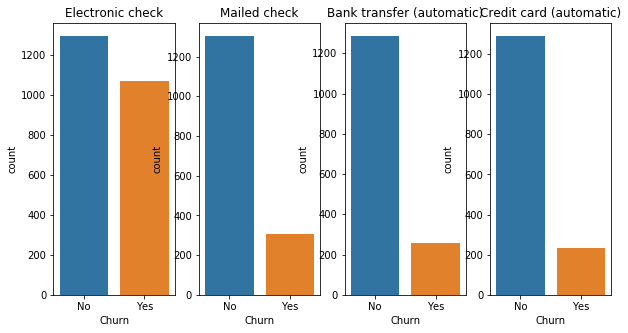

In [30]:
churn('PaymentMethod')
# The payment method is also a important fector as we can see that more than 1000 customer churned by using electronic check.
# So it is very important to have very convenient way for customers to pay their bill e.g. direct debit on credit card

PaperlessBilling


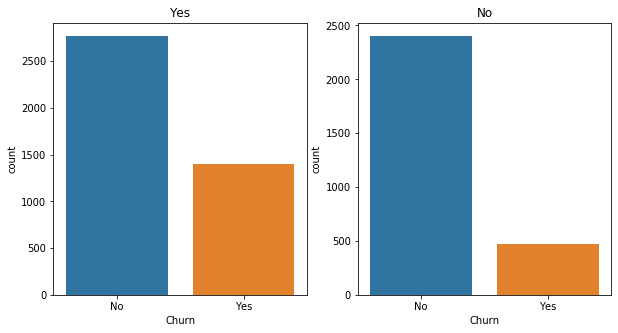

In [31]:
churn('PaperlessBilling')
# In this dataset, more people perfer to use paper bill so let's find out the reason

In [32]:
# this is the properly reason why more people perfer to use paper bill for not churned
number_of_senior = len((df[df['SeniorCitizen'] == 'Yes']))
print('number of Senior Citizens: {}'.format(number_of_senior))
print('number of young Citizens: {}'.format(len(df) - number_of_senior))

number of Senior Citizens: 5901
number of young Citizens: 1142


Averga monthly bill for young adults: 79.82
Averga monthly bill for seniors: 61.85


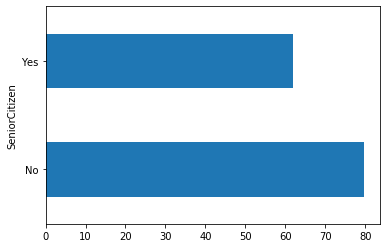

In [33]:
# let's explore more about how much average monthly bill for young adults and seniors
df.groupby('SeniorCitizen').mean()['MonthlyCharges'].plot(kind='barh')
young = df.groupby('SeniorCitizen')['MonthlyCharges'].mean().values[0]
senior = df.groupby('SeniorCitizen')['MonthlyCharges'].mean().values[1]
print('Averga monthly bill for young adults: {:.2f}'.format(young))
print('Averga monthly bill for seniors: {:.2f}'.format(senior))

bins


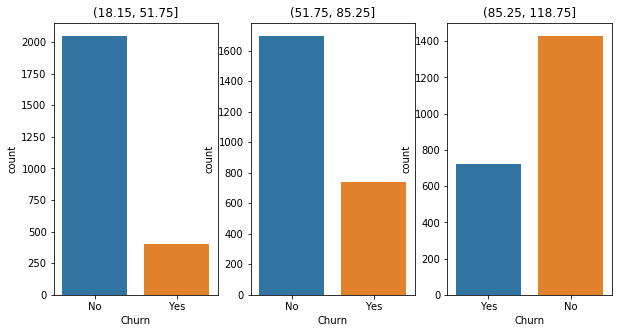

In [34]:
# let's cut the monthly charges in different range to see which range get the lowest churn rate
# it is reasonable to see that the low price will more likely to retain the customer
# when the monthly bill charges more than $85.25, customer will more likely to churn to seek better deal
bins = pd.cut(df['MonthlyCharges'],3)
df['bins'] = bins
churn('bins')

In [35]:
# let's see contract type compare to average monthly bill price
# The two year contract has lowest churn rate and also with lowest monthly price
df.groupby('Contract')['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

In [36]:
# let's see contract type compare to highest monthly bill price
df.groupby('Contract')['MonthlyCharges'].max()

Contract
Month-to-month    117.45
One year          118.60
Two year          118.75
Name: MonthlyCharges, dtype: float64

In [37]:
# let's see contract type compare to lowest monthly bill price
df.groupby('Contract')['MonthlyCharges'].min()

Contract
Month-to-month    18.75
One year          18.25
Two year          18.40
Name: MonthlyCharges, dtype: float64

OnlineBackup


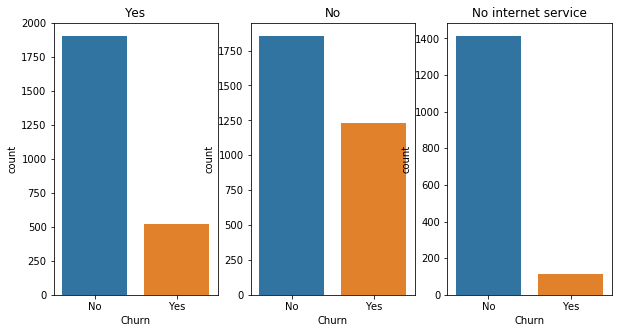

In [38]:
# let's check see if additional services provided to customers can reduce churn rate
churn('OnlineBackup')

DeviceProtection


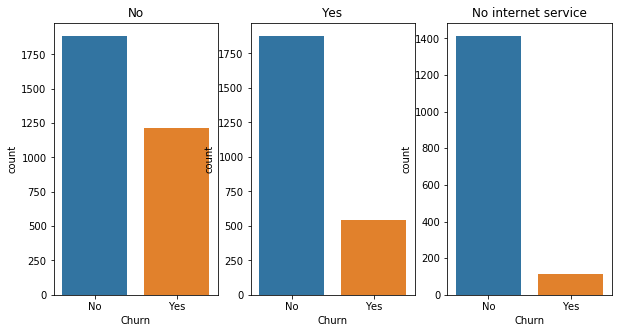

In [39]:
churn('DeviceProtection')

TechSupport


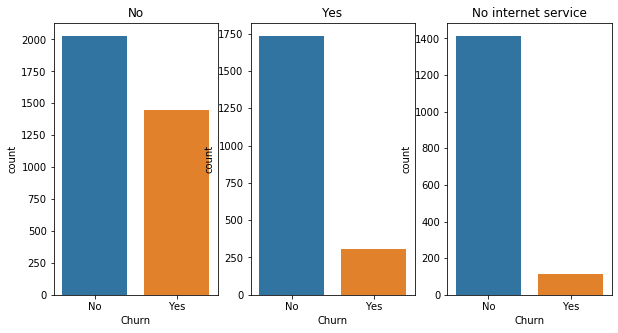

In [40]:
# we can see that companes should provide more serivces to customers in order to gain competition advanage, 
# otherwises it will they will have low customer retention rate.
churn('TechSupport')

gender


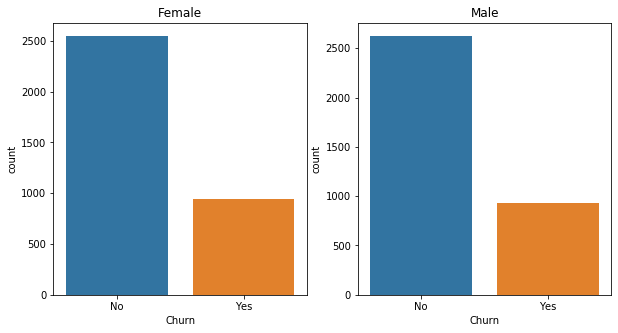

In [41]:
# check gender 
# gender is not an important factor for churning, because this is no much difference.
churn('gender')